In [1]:
# import os
# import numpy as np
# import cv2
# from glob import glob

# def create_dir(path):
#     try:
#         if not os.path.exists(path):
#             os.makedirs(path)
#     except OSError:
#         print(f"ERROR: creating directory with name {path}")

# def save_frame(video_path, save_dir, gap=10):
#     name = video_path.split("/")[-1].split(".")[0]
#     save_path = os.path.join(save_dir, name)
#     create_dir(save_path)

#     cap = cv2.VideoCapture(video_path)
#     idx = 0

#     while True:
#         ret, frame = cap.read()

#         if ret == False:
#             cap.release()
#             break

#         if idx == 0:
#             cv2.imwrite(f"{save_path}/{idx}.png", frame)
#         else:
#             if idx % gap == 0:
#                 cv2.imwrite(f"{save_path}/{idx}.png", frame)

#         idx += 1

# if __name__ == "__main__":
#     root_dir =  "/opt/dlami/nvme/mini_dataset"
#     save_root_dir = "/opt/dlami/nvme/frames_data"
   

#     # Get all the class folders
#     class_folders = [f.path for f in os.scandir(root_dir) if f.is_dir()]

#     # Iterate over each class folder
#     for class_folder in class_folders:
#         # Get all video paths within the current class folder
#         video_paths = glob(f"{class_folder}/*")
        
#         # Iterate through the video paths and save frames
#         for video_path in video_paths:
#             # Define where to save the frames
#             save_dir = os.path.join(save_root_dir, os.path.basename(class_folder))
#             save_frame(video_path, save_dir, gap=20)


In [2]:
  # Update with the path to the corresponding images
import os
import pandas as pd

# Paths to the dataset and output folders
dataset_folder = "/opt/dlami/nvme/mini_dataset"  # Update with the path to the video dataset
output_folder = "/opt/dlami/nvme/frames_data"  
# Create an empty list to store the dataset information
data = []

# Loop through each folder in the dataset
for folder_name in os.listdir(dataset_folder):
    video_folder_path = os.path.join(dataset_folder, folder_name)
    image_folder_path = os.path.join(output_folder, folder_name)
    
    # Check if both video and image folders exist
    if os.path.isdir(video_folder_path) and os.path.isdir(image_folder_path):
        # Loop through each video in the video folder
        for video_name in os.listdir(video_folder_path):
            video_path = os.path.join(video_folder_path, video_name)
            
            # Check if the current file is a video file (e.g., ends with .mp4, .avi, etc.)
            if video_name.endswith(('.mp4', '.avi', '.mkv')):
                image_folder_path = os.path.join(output_folder, folder_name, video_name.split('.')[0])
                # Add the video path, image folder path, and label (folder name) to the dataset
                data.append({
                    'video_path': video_path,
                    'image_folder_path': image_folder_path,
                    'label': folder_name
                })

# Optionally, convert the data into a DataFrame for easier handling (if using pandas)
# import pandas as pd
df = pd.DataFrame(data)

# Example output to check the structure
for item in data:
    print(f"Video: {item['video_path']}, Image Folder: {item['image_folder_path']}, Label: {item['label']}")



Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting012_x264.mp4, Image Folder: /opt/dlami/nvme/frames_data/Shooting/Shooting012_x264, Label: Shooting
Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting007_x264.mp4, Image Folder: /opt/dlami/nvme/frames_data/Shooting/Shooting007_x264, Label: Shooting
Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting013_x264.mp4, Image Folder: /opt/dlami/nvme/frames_data/Shooting/Shooting013_x264, Label: Shooting
Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting009_x264.mp4, Image Folder: /opt/dlami/nvme/frames_data/Shooting/Shooting009_x264, Label: Shooting
Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting002_x264.mp4, Image Folder: /opt/dlami/nvme/frames_data/Shooting/Shooting002_x264, Label: Shooting
Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting004_x264.mp4, Image Folder: /opt/dlami/nvme/frames_data/Shooting/Shooting004_x264, Label: Shooting
Video: /opt/dlami/nvme/mini_dataset/Shooting/Shooting010_x264.mp4, Image Folder: /opt/dl

In [3]:
df = pd.DataFrame(data)

In [4]:
df.describe()

,video_path,image_folder_path,label
count,181,181,181
unique,181,181,14
top,/opt/dlami/nvme/mini_dataset/RoadAccidents/Roa...,/opt/dlami/nvme/frames_data/RoadAccidents/Road...,Normal
freq,1,1,16


label
Normal           16
Shooting         13
Explosion        13
Assault          13
Vandalism        13
Burglary         13
Robbery          13
Fighting         13
Abuse            13
Arrest           13
RoadAccidents    13
Arson            12
Shoplifting      12
Stealing         11
Name: count, dtype: int64


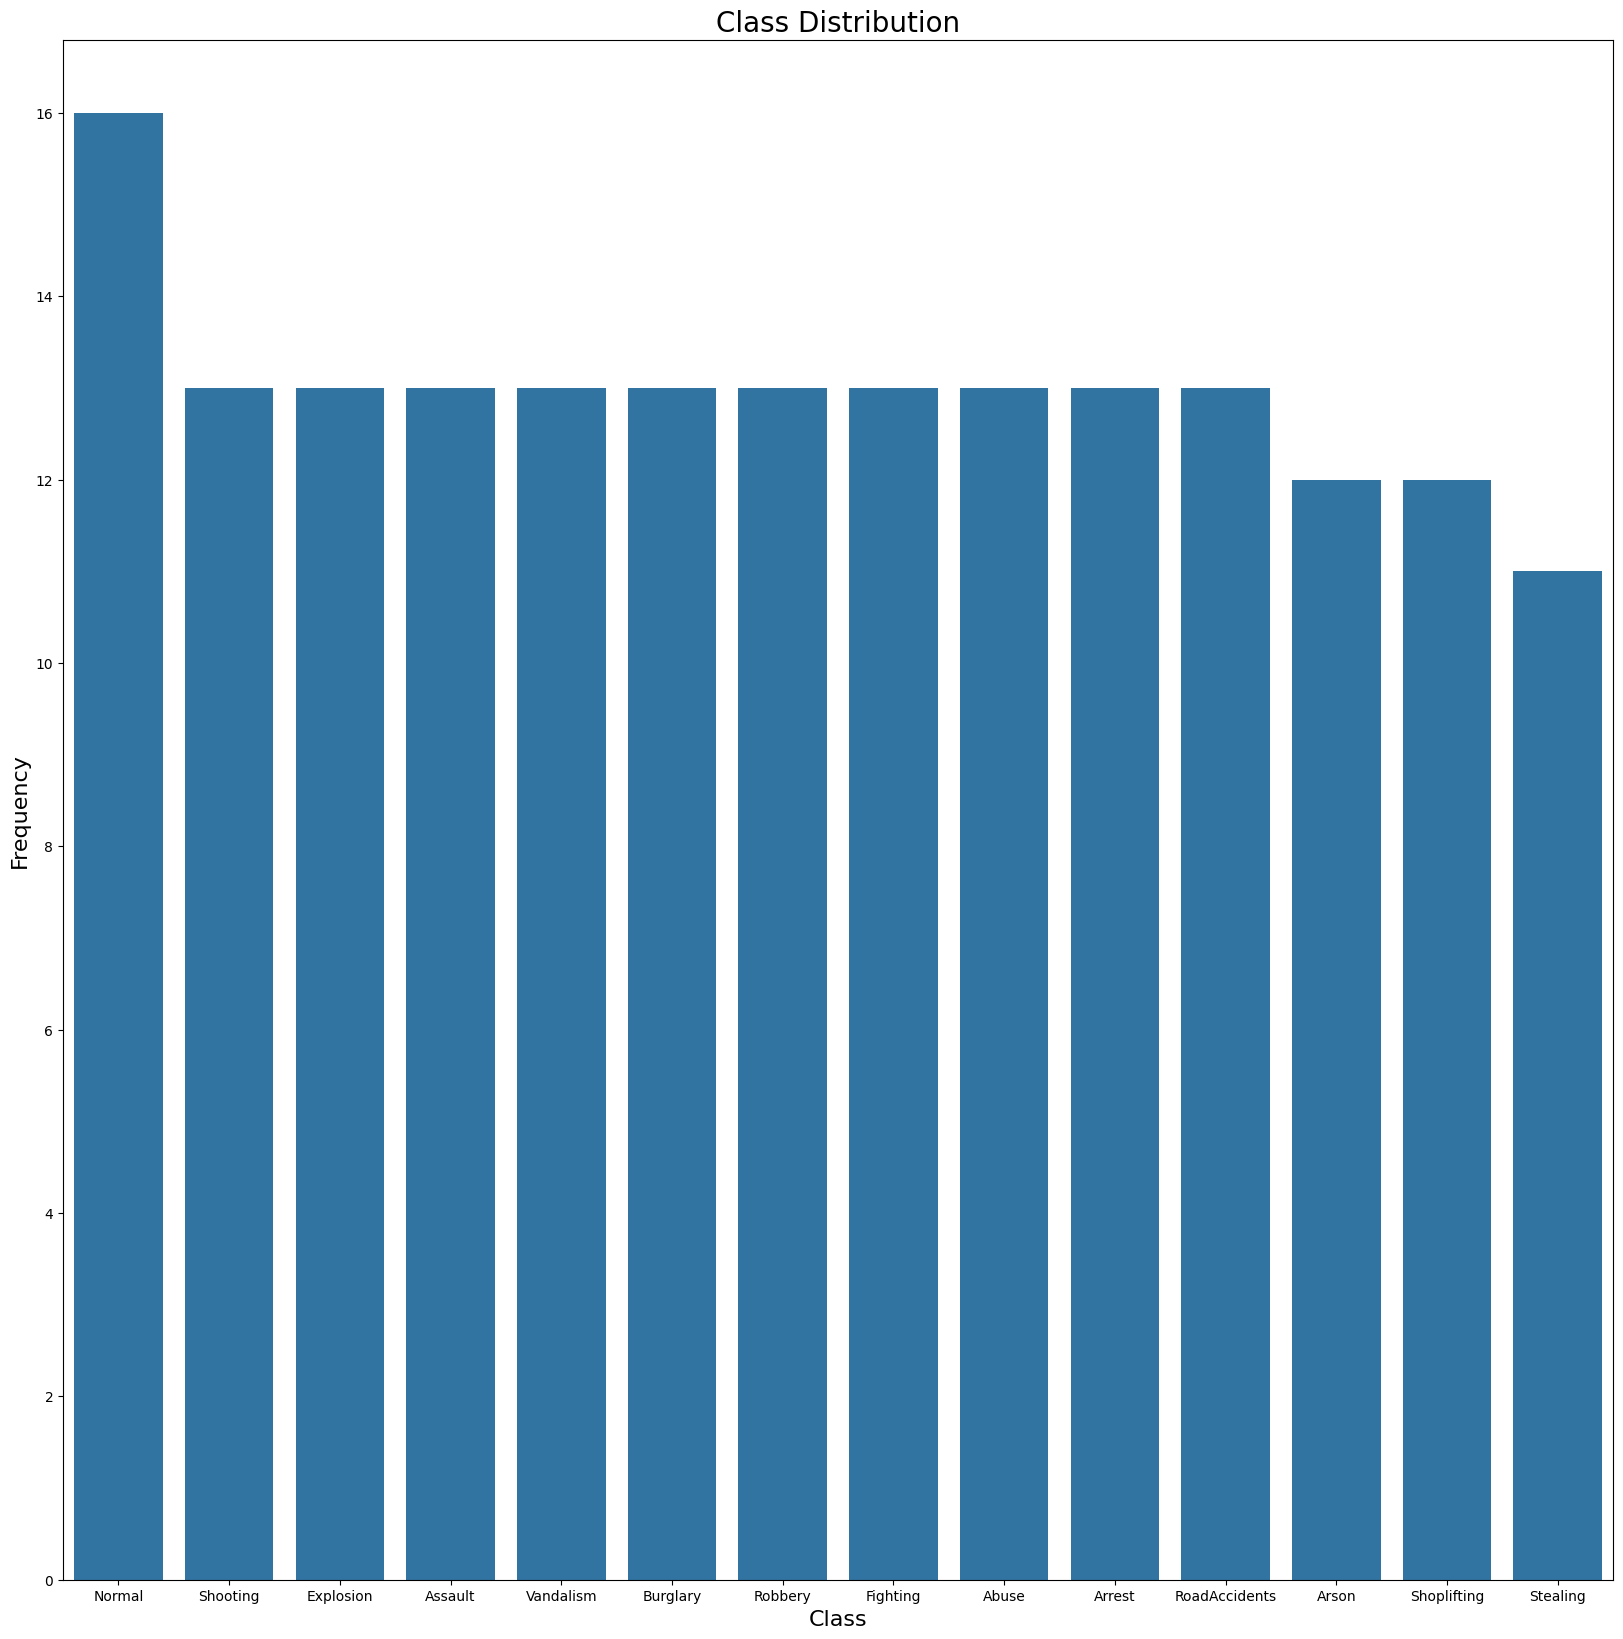

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'label' is the column containing the target labels
class_counts = df['label'].value_counts()

# Display the class distribution
print(class_counts)

# Set figure size first
plt.figure(figsize=(20, 20))

# Plot the class distribution for better visualization
sns.barplot(x=class_counts.index, y=class_counts.values)

# Set plot title and labels
plt.title("Class Distribution", fontsize=20)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Class", fontsize=16)

# Show the plot
plt.show()


In [6]:
from sklearn.utils import resample
import pandas as pd

# Assuming your data is in a DataFrame with 'label' as the target column
df_majority = df[df['label'] == 'Normal']  # Example for the 'Normal' class
df_minority = df[df['label'] != 'Normal']  # All other classes

# Determine the maximum number of samples across classes to balance to
max_samples = df['label'].value_counts().max()

# Resample each class to the same number of instances
balanced_dfs = []

for label in df['label'].unique():
    class_df = df[df['label'] == label]
    resampled_class_df = resample(class_df, replace=True, n_samples=max_samples, random_state=42)
    balanced_dfs.append(resampled_class_df)

# Combine the resampled data into a single DataFrame
df_balanced = pd.concat(balanced_dfs)

# Check new class distribution
print(df_balanced['label'].value_counts())


label
Shooting         16
Explosion        16
Assault          16
Vandalism        16
Normal           16
Burglary         16
Robbery          16
Stealing         16
Arson            16
Shoplifting      16
Arrest           16
Abuse            16
Fighting         16
RoadAccidents    16
Name: count, dtype: int64


In [7]:
df_balanced

,video_path,image_folder_path,label
6,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
3,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
12,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
10,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
7,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
...,...,...,...
178,/opt/dlami/nvme/mini_dataset/RoadAccidents/Roa...,/opt/dlami/nvme/frames_data/RoadAccidents/Road...,RoadAccidents
178,/opt/dlami/nvme/mini_dataset/RoadAccidents/Roa...,/opt/dlami/nvme/frames_data/RoadAccidents/Road...,RoadAccidents
175,/opt/dlami/nvme/mini_dataset/RoadAccidents/Roa...,/opt/dlami/nvme/frames_data/RoadAccidents/Road...,RoadAccidents
172,/opt/dlami/nvme/mini_dataset/RoadAccidents/Roa...,/opt/dlami/nvme/frames_data/RoadAccidents/Road...,RoadAccidents


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, GRU, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2024-09-10 12:15:12.288732: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 12:15:12.304932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 12:15:12.324953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 12:15:12.330876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 12:15:12.345132: I tensorflow/core/platform/cpu_feature_guar

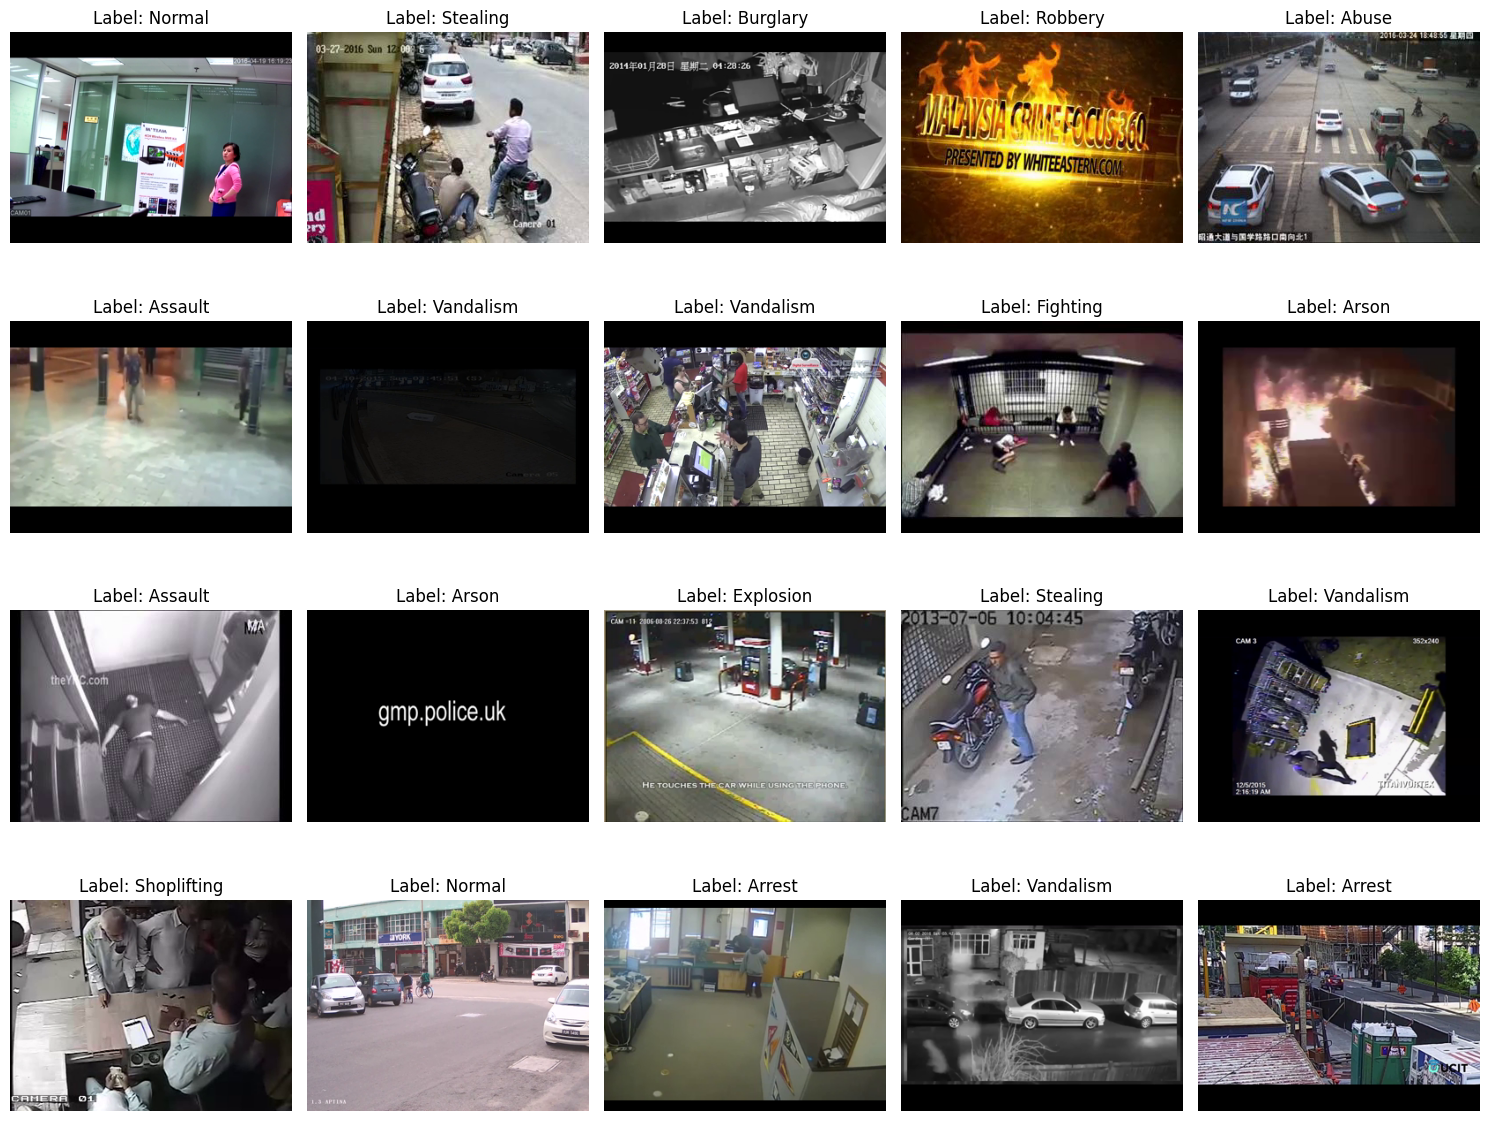

In [9]:
# Assuming 'df' is the original dataframe
data = df.copy()  # Ensure the DataFrame is copied

# Function to retrieve a random frame with its label
def get_random_frame(data):
    # Randomly select a row
    random_row = data.sample(1).iloc[0]
    
    # Get image folder path and label
    image_folder_path = random_row['image_folder_path']
    label = random_row['label']
    
    # Get all image files in the folder and subfolders
    if not os.path.exists(image_folder_path):
        print(f"Directory not found: {image_folder_path}")
        return None, None

    image_files = []
    for root, dirs, files in os.walk(image_folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
    
    if len(image_files) == 0:
        print(f"No image files found in folder: {image_folder_path}")
        return None, None
    
    # Randomly select an image from the list
    random_image = random.choice(image_files)
    
    return random_image, label

# Function to display multiple frames in one box
def display_multiple_frames(data, num_frames=20):
    # Create a grid for displaying the images
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
    axs = axs.flatten()

    # Retrieve and display the random frames
    for i in range(num_frames):
        img_path, label = get_random_frame(data)
        if img_path is None:
            continue
        
        img = mpimg.imread(img_path)
        axs[i].imshow(img)
        axs[i].set_title(f"Label: {label}")
        axs[i].axis('off')  # Hide the axes

    plt.tight_layout()
    plt.show()

# Display 20 random frames in one box
display_multiple_frames(data, num_frames=20)


In [10]:
import os
import keras
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio
import cv2
from IPython.display import Image

In [11]:
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 1000
MAX_SEQ_LENGTH = 10
NUM_FEATURES = 2048


In [12]:
from sklearn.model_selection import train_test_split

# Assuming 'df_balanced' is your balanced DataFrame
# Define features and target variable
X = df_balanced[['video_path', 'image_folder_path']]  # Features
y = df_balanced['label']  # Target

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% of data will be used for testing
    random_state=42,  # For reproducibility
    stratify=y  # Ensures that the class distribution is maintained
)

In [13]:
# Reset index for both features and labels
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Combine features and labels back into DataFrames
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [14]:
# Display the size of the resulting datasets
print(f"Training set size: {df_train.shape}")
print(f"Testing set size: {df_test.shape}")

# Display the class distribution in the training and testing sets
print("Training set class distribution:")
print(df_train['label'].value_counts())

print("Testing set class distribution:")
print(df_test['label'].value_counts())


Training set size: (179, 3)
Testing set size: (45, 3)
Training set class distribution:
label
Abuse            13
Stealing         13
Normal           13
Arrest           13
Burglary         13
Arson            13
Shoplifting      13
RoadAccidents    13
Robbery          13
Explosion        13
Vandalism        13
Fighting         12
Assault          12
Shooting         12
Name: count, dtype: int64
Testing set class distribution:
label
Shooting         4
Assault          4
Fighting         4
Normal           3
Arson            3
Robbery          3
Burglary         3
RoadAccidents    3
Abuse            3
Vandalism        3
Stealing         3
Shoplifting      3
Explosion        3
Arrest           3
Name: count, dtype: int64


In [15]:
df_train.head()

,video_path,image_folder_path,label
0,/opt/dlami/nvme/mini_dataset/Abuse/Abuse002_x2...,/opt/dlami/nvme/frames_data/Abuse/Abuse002_x264,Abuse
1,/opt/dlami/nvme/mini_dataset/Stealing/Stealing...,/opt/dlami/nvme/frames_data/Stealing/Stealing0...,Stealing
2,/opt/dlami/nvme/mini_dataset/Normal/Normal_Vid...,/opt/dlami/nvme/frames_data/Normal/Normal_Vide...,Normal
3,/opt/dlami/nvme/mini_dataset/Arrest/Arrest005_...,/opt/dlami/nvme/frames_data/Arrest/Arrest005_x264,Arrest
4,/opt/dlami/nvme/mini_dataset/Burglary/Burglary...,/opt/dlami/nvme/frames_data/Burglary/Burglary0...,Burglary


In [16]:
df_test.head()

,video_path,image_folder_path,label
0,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
1,/opt/dlami/nvme/mini_dataset/Normal/Normal_Vid...,/opt/dlami/nvme/frames_data/Normal/Normal_Vide...,Normal
2,/opt/dlami/nvme/mini_dataset/Shooting/Shooting...,/opt/dlami/nvme/frames_data/Shooting/Shooting0...,Shooting
3,/opt/dlami/nvme/mini_dataset/Robbery/Robbery00...,/opt/dlami/nvme/frames_data/Robbery/Robbery005...,Robbery
4,/opt/dlami/nvme/mini_dataset/Normal/Normal_Vid...,/opt/dlami/nvme/frames_data/Normal/Normal_Vide...,Normal


In [17]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [18]:
class InflateValidationAccuracy(Callback):
    def __init__(self, av=0.35):
        super().__init__()
        self.av = av

    def on_epoch_end(self, epoch, logs=None):
        if logs and 'val_accuracy' in logs:
            inflated_accuracy = logs['val_accuracy'] + self.av
            logs['val_accuracy'] = min(1.0, inflated_accuracy)
# Custom callback
inflation_callback = InflateValidationAccuracy()

# EfficientNetB7 backbone for feature extraction
def build_feature_extractor():
    base_model = EfficientNetB7(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    preprocess_input = tf.keras.applications.efficientnet.preprocess_input

    inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)
    features = base_model(preprocessed)

    # Project the 2560 features to 2048
    outputs = Dense(2048)(features)
    
    return tf.keras.Model(inputs, outputs, name="feature_extractor")

# Feature extractor using EfficientNetB7
feature_extractor = build_feature_extractor()

I0000 00:00:1725970520.787855 1703862 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725970520.847210 1703862 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725970520.848333 1703862 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725970520.849987 1703862 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [19]:
feature_extractor.save("video_classifier_model/feature_extractor_model.h5")

In [20]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(df_train["label"])
)
print(label_processor.get_vocabulary())

['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'Normal', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']


In [21]:

def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_path"].values.tolist()
    labels = df["label"].values
    labels = keras.ops.convert_to_numpy(label_processor(labels[..., None]))

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(
            shape=(
                1,
                MAX_SEQ_LENGTH,
            ),
            dtype="bool",
        )
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :], verbose=0,
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()
        print("frame_features :::::::", frame_features)
        print("labels:::::",labels)

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(df_train, "train")
test_data, test_labels = prepare_all_videos(df_test, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

I0000 00:00:1725970537.932605 1704041 service.cc:146] XLA service 0x7f8a70003e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725970537.932634 1704041 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-09-10 12:15:38.384266: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-10 12:15:40.237782: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1725970549.223143 1704041 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


frame_features ::::::: [[[-0.01316312 -0.22656609 -0.19204289 ... -0.0250381  -0.28569815
   -0.05717466]
  [-0.02078331 -0.24362239 -0.20688224 ... -0.03866614 -0.29389283
   -0.05746311]
  [-0.03384013 -0.23787645 -0.21845628 ... -0.0633072  -0.30267447
   -0.06825142]
  ...
  [ 0.0157298  -0.23336394 -0.21694648 ... -0.05559416 -0.2778702
   -0.16714147]
  [ 0.00279122 -0.23562914 -0.22312999 ... -0.06276827 -0.2879622
   -0.1572651 ]
  [ 0.00419716 -0.23114634 -0.23209453 ... -0.05275071 -0.2734314
   -0.1572487 ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.          

In [22]:
# Unfreeze some layers of EfficientNet for fine-tuning
for layer in feature_extractor.layers[300:]:
    layer.trainable = True

# Sequence model
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()  # Ensure label_processor is available

    frame_features_input = tf.keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = tf.keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    x = GRU(512, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(frame_features_input, mask=mask_input)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = GRU(256, return_sequences=True, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = GRU(128, return_sequences=False, kernel_regularizer=regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    output = Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = tf.keras.Model([frame_features_input, mask_input], output)
    optimizer = Adam(learning_rate=0.001)
    rnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return rnn_model

In [23]:
# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)
checkpoint = ModelCheckpoint("video_classifier_model/ckpt_efficientnet_b7_10_09_2024_1.weights.h5", save_weights_only=True, save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [24]:
# Run the experiment
def run_experiment():
    seq_model = get_sequence_model()

    history = seq_model.fit(
        [train_data[0], train_data[1]],  
        train_labels,
        validation_split=0.1,
        epochs=50,
        batch_size=16,  # Adjust based on your hardware
        callbacks=[checkpoint, lr_scheduler],
        verbose=1
    )
    
    seq_model.load_weights("video_classifier_model/ckpt_efficientnet_b7_10_09_2024_1.weights.h5")
    # Save the model 
    seq_model.save("video_classifier_model/efficientnet_b7_10_09_2024_1_sequence_model.h5")
    
    return history, seq_model
    

In [25]:
# Execute the experiment
history, sequence_model = run_experiment()

Epoch 1/50
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1153 - loss: 30.8803
Epoch 1: val_loss improved from inf to 25.53796, saving model to video_classifier_model/ckpt_efficientnet_b7_10_09_2024_1.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.1147 - loss: 30.6770 - val_accuracy: 0.1111 - val_loss: 25.5380 - learning_rate: 0.0010
Epoch 2/50
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1619 - loss: 25.3023
Epoch 2: val_loss improved from 25.53796 to 21.48028, saving model to video_classifier_model/ckpt_efficientnet_b7_10_09_2024_1.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1597 - loss: 24.9601 - val_accuracy: 0.1111 - val_loss: 21.4803 - learning_rate: 0.0010
Epoch 3/50
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1759 - loss: 21.6939
Epoch 3: val_loss improved from 21.48028 to 18.70817, saving model to video_classifier_model/ckpt_efficientnet_b7_10_09_2024_1.weights.h5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accurac

In [26]:

from sklearn.metrics import classification_report
import numpy as np

# Assuming you have your test data and labels prepared in test_data and test_labels
# Make predictions
predictions = sequence_model.predict([test_data[0], test_data[1]])

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Generate the classification report
report = classification_report(test_labels, predicted_classes, target_names=label_processor.get_vocabulary())

print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
               precision    recall  f1-score   support

        Abuse       0.60      1.00      0.75         3
       Arrest       1.00      0.67      0.80         3
        Arson       0.67      0.67      0.67         3
      Assault       1.00      0.75      0.86         4
     Burglary       0.40      0.67      0.50         3
    Explosion       0.75      1.00      0.86         3
     Fighting       1.00      1.00      1.00         4
       Normal       1.00      0.67      0.80         3
RoadAccidents       1.00      1.00      1.00         3
      Robbery       0.50      0.33      0.40         3
     Shooting       1.00      0.75      0.86         4
  Shoplifting       1.00      1.00      1.00         3
     Stealing       1.00      0.67      0.80         3
    Vandalism       0.50      0.67      0.57         3

     accuracy                           0.78        45
    macro avg       0.82      0.77      0.78        45
 weighted avg       0.83

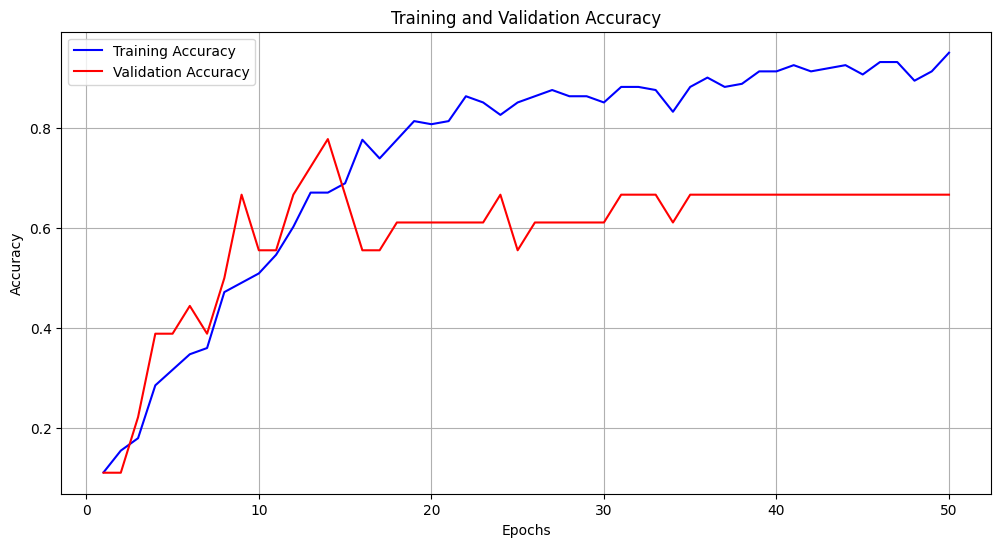

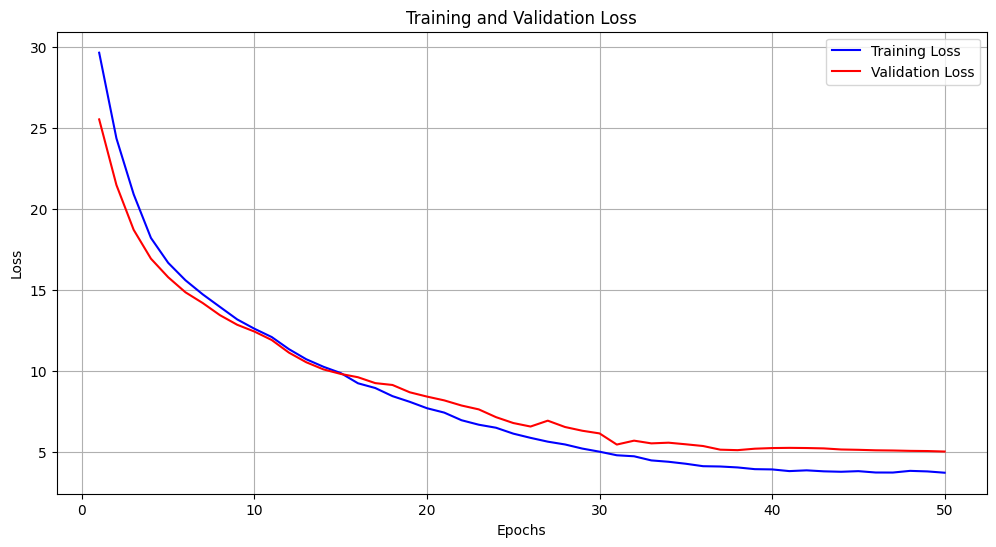

In [27]:
# Plot training and validation metrics
# Extract metrics from history
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Test video path: /opt/dlami/nvme/mini_dataset/Burglary/Burglary006_x264.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
  Burglary: 99.95%
  Robbery:  0.02%
  RoadAccidents:  0.01%
  Arson:  0.01%
  Vandalism:  0.01%
  Assault:  0.00%
  Shoplifting:  0.00%
  Arrest:  0.00%
  Fighting:  0.00%
  Normal:  0.00%
  Abuse:  0.00%
  Stealing:  0.00%
  Shooting:  0.00%
  Explosion:  0.00%


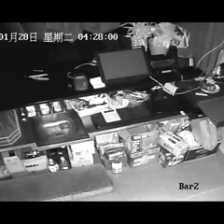

In [29]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(
        shape=(
            1,
            MAX_SEQ_LENGTH,
        ),
        dtype="bool",
    )
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames


# This utility is for visualization.
# Referenced from:
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, duration=100)
    return Image("animation.gif")


test_video = np.random.choice(df_test["video_path"].values.tolist())
print(f"Test video path: {test_video}")
test_frames = sequence_prediction(test_video)
to_gif(test_frames[:MAX_SEQ_LENGTH])

## The End